<a href="https://colab.research.google.com/github/moritamu/Tanjyou/blob/main/AI%E3%83%AA%E3%83%86%E3%83%A9%E3%82%B7%E3%83%BC13%E8%AC%9B.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### リスト13-1

In [ ]:
!pip install fbprophet

### リスト13-2

In [ ]:
from vega_datasets import data
co2 = data.co2_concentration()
co2

,Date,CO2
0,1958-03-01,315.70
1,1958-04-01,317.46
2,1958-05-01,317.51
3,1958-07-01,315.86
4,1958-08-01,314.93
...,...,...
708,2017-08-01,405.24
709,2017-09-01,403.27
710,2017-10-01,403.64
711,2017-11-01,405.17


### リスト13-3

In [ ]:
import plotly.express as px
px.line(co2,x="Date",y="CO2")

### リスト13-4

In [ ]:
co2.rename(columns={"Date":"ds","CO2":"y"},inplace=True)
co2

,ds,y
0,1958-03-01,315.70
1,1958-04-01,317.46
2,1958-05-01,317.51
3,1958-07-01,315.86
4,1958-08-01,314.93
...,...,...
708,2017-08-01,405.24
709,2017-09-01,403.27
710,2017-10-01,403.64
711,2017-11-01,405.17


### リスト13-5

INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


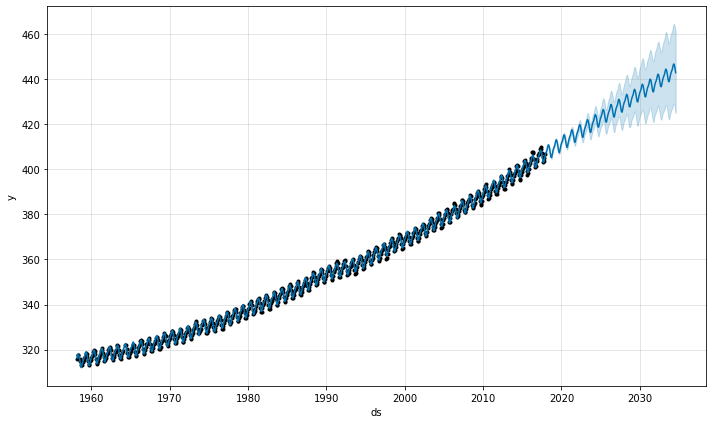

In [ ]:
from fbprophet import Prophet
model = Prophet()
model.fit(co2)
future = model.make_future_dataframe(periods=200, freq='M')
forecast = model.predict(future)
model.plot(forecast);

### リスト13-6

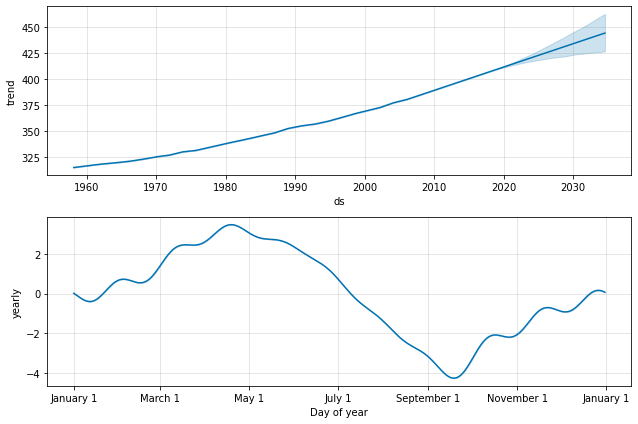

In [ ]:
model.plot_components(forecast);

### リスト13-7

In [ ]:
import pandas as pd
email = pd.read_csv('email.csv')
email

,type,text
0,0,Go until jurong point crazy.. Available only ...
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,Nah I don't think he goes to usf he lives aro...
...,...,...
5566,0,Why don't you wait 'til at least wednesday to ...
5567,0,Huh y lei...
5568,1,REMINDER FROM O2: To get 2.50 pounds free call...
5569,1,This is the 2nd time we have tried 2 contact u...


### リスト13-8

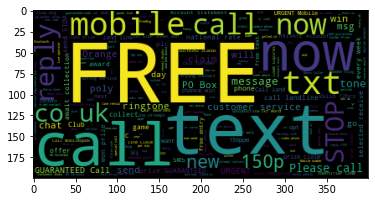

In [ ]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

spam = email[email['type'] == 1]
spam_words = ' '.join(spam['text'])
spam_wc = WordCloud()
spam_wc.generate(spam_words)
plt.imshow(spam_wc)
plt.show()

### リスト13-9

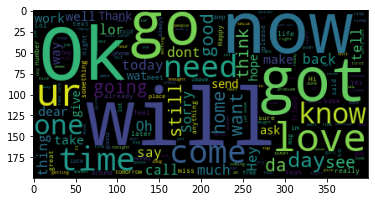

In [ ]:
ham = email[email['type'] == 0]
ham_words = ' '.join(ham['text'])
ham_wc = WordCloud()
ham_wc.generate(ham_words)
plt.imshow(ham_wc)
plt.show()

### リスト13-10

In [ ]:
email['text'] = email['text'].str.lower()
email

,type,text
0,0,go until jurong point crazy.. available only ...
1,0,ok lar... joking wif u oni...
2,1,free entry in 2 a wkly comp to win fa cup fina...
3,0,u dun say so early hor... u c already then say...
4,0,nah i don't think he goes to usf he lives aro...
...,...,...
5566,0,why don't you wait 'til at least wednesday to ...
5567,0,huh y lei...
5568,1,reminder from o2: to get 2.50 pounds free call...
5569,1,this is the 2nd time we have tried 2 contact u...


### リスト13-11

In [ ]:
email['text'] = email['text'].str.replace(' the ', ' ')
email['text'] = email['text'].str.replace(' a ', ' ')
email['text'] = email['text'].str.replace(' an ', ' ')
email

,type,text
0,0,go until jurong point crazy.. available only ...
1,0,ok lar... joking wif u oni...
2,1,free entry in 2 wkly comp to win fa cup final ...
3,0,u dun say so early hor... u c already then say...
4,0,nah i don't think he goes to usf he lives aro...
...,...,...
5566,0,why don't you wait 'til at least wednesday to ...
5567,0,huh y lei...
5568,1,reminder from o2: to get 2.50 pounds free call...
5569,1,this is 2nd time we have tried 2 contact u. u ...


### リスト13-12

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer
vector = CountVectorizer(min_df = 3)
vector.fit(email['text'])
text_vec = vector.transform(email['text'])

dict(list(vector.vocabulary_.items())[0:5])

{'available': 348, 'crazy': 686, 'go': 1087, 'point': 1880, 'until': 2575}

### リスト13-13

In [ ]:
from sklearn.naive_bayes import BernoulliNB
model = BernoulliNB()
model.fit(text_vec, email['type'])

BernoulliNB(alpha=1.0, binarize=0.0, class_prior=None, fit_prior=True)

### リスト13-14

In [ ]:
model.score(text_vec, email['type'])

0.9881529348411416

### リスト13-15

In [ ]:
test = pd.DataFrame(['I cant pick the phone right now.'])
test_vec = vector.transform(test[0])
model.predict(test_vec)

array([0])

### リスト13-16

In [ ]:
test = pd.DataFrame(['Congratulations ur awarded $500.'])
test_vec = vector.transform(test[0])
model.predict(test_vec)

array([1])